# Setup

## Imports

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.collections import PolyCollection

## Read Data

In [3]:
filename = 'data/preprocessed_counts.pkl'
df = pd.read_pickle(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2002-01-31 to 2021-07-31
Freq: M
Data columns (total 68 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   26      137 non-null    float64
 1   27      48 non-null     float64
 2   28      211 non-null    float64
 3   29      114 non-null    float64
 4   31      102 non-null    float64
 5   32      79 non-null     float64
 6   33      126 non-null    float64
 7   34      125 non-null    float64
 8   35      137 non-null    float64
 9   38      114 non-null    float64
 10  39      114 non-null    float64
 11  41      91 non-null     float64
 12  42      91 non-null     float64
 13  43      90 non-null     float64
 14  44      64 non-null     float64
 15  45      67 non-null     float64
 16  46      49 non-null     float64
 17  51      219 non-null    float64
 18  103     188 non-null    float64
 19  110     209 non-null    float64
 20  164     234 non-null    float64
 21  179     226 

In [4]:
df.head()

,26,27,28,29,31,32,33,34,35,38,...,388,389,390,405,410,420,425,458,460,464
2002-01-31,NaN,NaN,9620.677419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17099.419355,43063.967742,9098.354839,91593.677419,2478.032258,28848.193548,22367.645161,5806.967742,6322.290323,21335.419355
2002-02-28,NaN,NaN,9800.571429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16992.714286,43609.428571,9284.142857,92353.821429,2522.464286,29679.785714,22601.678571,6060.321429,6405.071429,21169.500000
2002-03-31,NaN,NaN,9521.419355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16797.903226,41141.096774,9178.806452,90676.935484,2456.516129,29762.064516,22129.548387,5680.000000,6292.290323,21168.612903
2002-04-30,NaN,NaN,9661.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18514.966667,45046.666667,10424.833333,97194.233333,2827.666667,31569.733333,24149.933333,6704.400000,6837.900000,22948.033333
2002-05-31,NaN,NaN,8678.483871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19991.322581,43545.935484,11579.064516,101114.645161,3188.903226,32434.161290,25542.000000,7206.967742,7450.000000,22834.774194


In [5]:
df.tail()

,26,27,28,29,31,32,33,34,35,38,...,388,389,390,405,410,420,425,458,460,464
2021-03-31,19149.653226,NaN,6748.344086,NaN,4626.032258,27543.720430,4287.491935,2628.473118,NaN,29021.763441,...,17716.903226,34722.021505,9215.086022,82354.290323,3066.204301,27665.516129,17430.860215,7764.698925,3427.139785,17378.075269
2021-04-30,20797.333333,6458.900000,6982.833333,NaN,4757.100000,30240.808333,NaN,3284.227778,NaN,28475.633333,...,18921.333333,35668.733333,10343.600000,86072.500000,3371.133333,28831.033333,19060.233333,8673.600000,2599.633333,18173.494444
2021-05-31,22404.935484,7323.153226,7312.193548,NaN,5114.559140,31607.107527,4531.096774,NaN,NaN,29782.387097,...,20783.354839,36313.548387,11512.838710,90431.387097,3820.129032,29836.967742,19680.080645,9374.225806,3625.032258,19249.473118
2021-06-30,24825.288889,7683.130556,7676.433333,NaN,5402.944444,33573.533333,4742.800000,NaN,7151.655556,32718.200000,...,22065.666667,39609.900000,11792.866667,97449.538889,4122.466667,30650.333333,22119.066667,9219.200000,NaN,20370.433333
2021-07-31,NaN,8313.586022,7536.677419,NaN,5593.225806,33367.067204,4442.451613,611.612903,7406.524194,32919.758065,...,21940.451613,39853.419355,11044.838710,96319.387097,3888.354839,29888.612903,21805.000000,8637.354839,NaN,20055.502688


# Data Analysis

## Station Metadata

We first read information about the stations in the data set. In particular, the urban/rural and functional class features give details about the type of road that the station lies on.

In [6]:
filename = 'data/active_stations.pkl'
station_df = pd.read_pickle(filename)
station_df.head()

,Continuous Number,Sequence Number,Collection Type,Route,Pos Dir Dir,Pos Lanes,Neg Lanes,Urban/Rural,Functional Class,County Name,Location Text
0,26,5707,WIM,I-35,North,2,2,Rural,Interstate,Steele,"3.5 MI N OF TH30, N OF ELLENDALE"
1,27,9830,WIM,TH 60,East,2,2,Rural,Principal Arterial - Other,Watonwan,"0.7 MI W OF W JCT OF TH4, SW OF ST JAMES"
2,28,22993,"ATR Volume, Speed, Class",MSAS 114,East,1,1,Urban,Minor Arterial,Stearns,W OF 20TH AVE N IN ST CLOUD
3,29,69377,WIM,TH 53,North,2,2,Rural,Principal Arterial - Other,Saint Louis,"3 MI S OF CSAH59 (MELRUDE RD), S OF EVELETH"
4,30,6757,WIM,TH 61,North,2,2,Rural,Principal Arterial - Other,Lake,"SW OF CSAH25, SW OF TWO HARBORS"


In [7]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Continuous Number  104 non-null    int64 
 1   Sequence Number    104 non-null    int64 
 2   Collection Type    104 non-null    object
 3   Route              104 non-null    object
 4   Pos Dir Dir        104 non-null    object
 5   Pos Lanes          104 non-null    int64 
 6   Neg Lanes          104 non-null    int64 
 7   Urban/Rural        104 non-null    object
 8   Functional Class   104 non-null    object
 9   County Name        104 non-null    object
 10  Location Text      104 non-null    object
dtypes: int64(4), object(7)
memory usage: 9.1+ KB


In [8]:
meta_df = pd.DataFrame({
    'station_id': station_df['Continuous Number'],
    'urban_rural': station_df['Urban/Rural'],
    'functional_class': station_df['Functional Class']
})

In [9]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   station_id        104 non-null    int64 
 1   urban_rural       104 non-null    object
 2   functional_class  104 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.6+ KB


In [10]:
meta_df.head()

,station_id,urban_rural,functional_class
0,26,Rural,Interstate
1,27,Rural,Principal Arterial - Other
2,28,Urban,Minor Arterial
3,29,Rural,Principal Arterial - Other
4,30,Rural,Principal Arterial - Other


We've already removed a number of stations which are either new or haven't been updated recently. Remove these from the table we've just created.

In [11]:
# Remove stations from metadata if it is a station we are not using. 
is_tracked = meta_df.station_id.isin(df.columns)
meta_df = meta_df[is_tracked]
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 89
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   station_id        68 non-null     int64 
 1   urban_rural       68 non-null     object
 2   functional_class  68 non-null     object
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [12]:
meta_df.head()

,station_id,urban_rural,functional_class
0,26,Rural,Interstate
1,27,Rural,Principal Arterial - Other
2,28,Urban,Minor Arterial
3,29,Rural,Principal Arterial - Other
5,31,Rural,Principal Arterial - Other


We initally look at the distribution of the stations between urban and rural environments and then the distribution by road type.

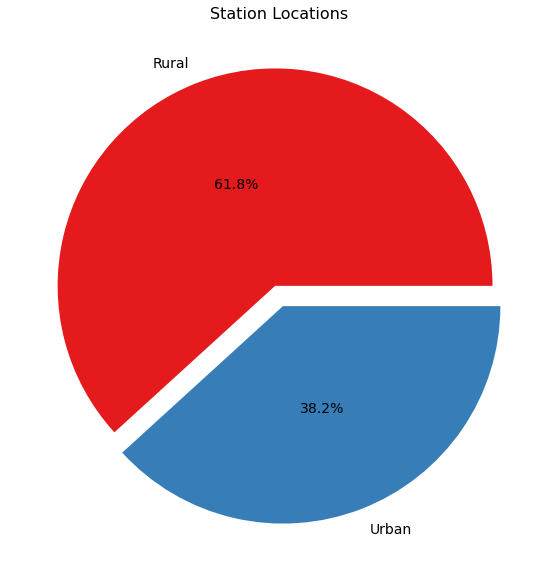

In [13]:
# Look at distribution of urban/rural in the data we keep.
# We want a pie chart, so we first need a frequency breakdown.
colors = sns.color_palette('Set1')
urban_rural_freq = meta_df.groupby('urban_rural').count()['station_id']
urban_rural_freq.name = None
fig, ax = plt.subplots(figsize=(10,10));
plt.pie(x=urban_rural_freq, autopct="%.1f%%", explode=[0.05]*2, labels=urban_rural_freq.index, 
        pctdistance=0.5, colors=colors, textprops={'fontsize': 14});
fig.savefig('../LaTeX/figures/urban_rural_pie.png', bbox_inches='tight');
plt.title('Station Locations', fontsize=16);
plt.show()

The functional class shows a [hierarchy](https://en.wikipedia.org/wiki/Road_hierarchy) of road types. [Interstates and other freeways](https://en.wikipedia.org/wiki/Controlled-access_highway) (indicated in the class "Principal Arterial - Other Freeways and Expressways") are high speed limited-access multilane roads intended to move large volumes of traffic over distances. Arterials (both major and minor) are regional. They are higher volume roads and ideally have few intersections. Their intent is to move traffic between freeways and [collectors](https://en.wikipedia.org/wiki/Collector_road), which serve as a mid-capacity road. Collectors then connect to local roads, which often serve residential neighborhoods.

In [14]:
# Next, the pie chart to show functional class. We would like colors to be in a consistent order.
label_color_order = ['Interstate', 'Principal Arterial - Other Freeways and Expressways', 'Principal Arterial - Other', 
              'Minor Arterial', 'Major Collector', 'Local']
label_colors = { label: colors[i] for i, label in enumerate(label_color_order) }

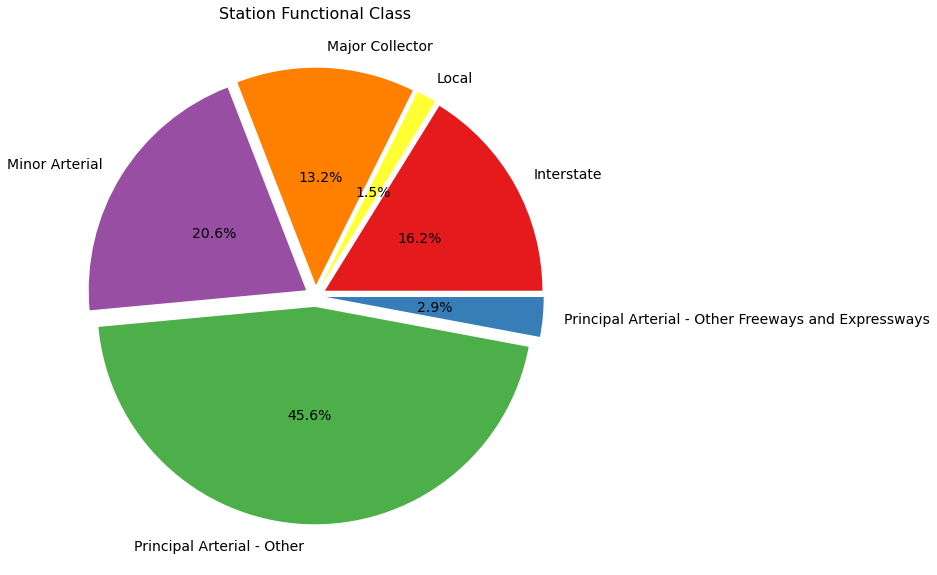

In [15]:
class_freq = meta_df.groupby('functional_class').count()['station_id']
class_freq.name = None
fig, ax = plt.subplots(figsize=(10,10));
# 
plt.pie(x=class_freq, autopct="%.1f%%", explode=[0.05]*len(class_freq.index), labels=class_freq.index, 
        pctdistance=0.5, colors=[label_colors[key] for key in class_freq.index], textprops={'fontsize': 14});
fig.savefig('../LaTeX/figures/functional_class_pie.png', bbox_inches='tight');
plt.title('Station Functional Class', fontsize=16);
plt.show()

# Missing Data

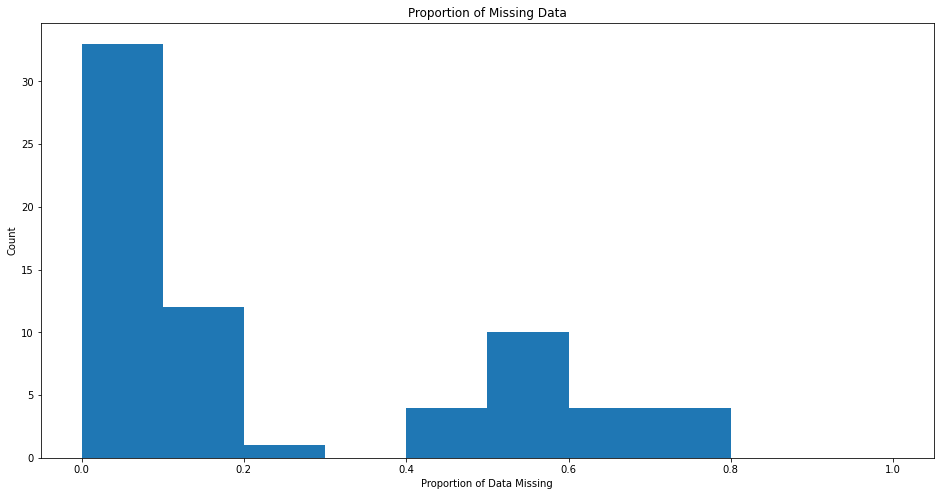

In [16]:
df.isna().mean().hist(figsize=(16,8), range=(0,1));
plt.grid(None)
plt.xlabel('Proportion of Data Missing');
plt.ylabel('Count');
plt.title('Proportion of Missing Data');

In [17]:
# Get proportion of missing data as column in metadata table.
meta_df = meta_df.merge(df.apply(lambda x: x.isna().mean()).rename('missing_pct'), left_on='station_id', right_index=True)

In [18]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 89
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station_id        68 non-null     int64  
 1   urban_rural       68 non-null     object 
 2   functional_class  68 non-null     object 
 3   missing_pct       68 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.7+ KB


In [19]:
meta_df.head()

,station_id,urban_rural,functional_class,missing_pct
0,26,Rural,Interstate,0.417021
1,27,Rural,Principal Arterial - Other,0.795745
2,28,Urban,Minor Arterial,0.102128
3,29,Rural,Principal Arterial - Other,0.514894
5,31,Rural,Principal Arterial - Other,0.565957


In [20]:
meta_df.functional_class.unique()

array(['Interstate', 'Principal Arterial - Other', 'Minor Arterial',
       'Principal Arterial - Other Freeways and Expressways',
       'Major Collector', 'Local'], dtype=object)

In [21]:
meta_df.rename({'functional_class': 'Functional Class'}, axis=1)

,station_id,urban_rural,Functional Class,missing_pct
0,26,Rural,Interstate,0.417021
1,27,Rural,Principal Arterial - Other,0.795745
2,28,Urban,Minor Arterial,0.102128
3,29,Rural,Principal Arterial - Other,0.514894
5,31,Rural,Principal Arterial - Other,0.565957
...,...,...,...,...
85,420,Urban,Principal Arterial - Other,0.004255
86,425,Urban,Minor Arterial,0.025532
87,458,Urban,Local,0.000000
88,460,Urban,Major Collector,0.008511


We examine missing data by location (urban vs. rural) and functional class. Neither feature has an obvious correlation with missing data.

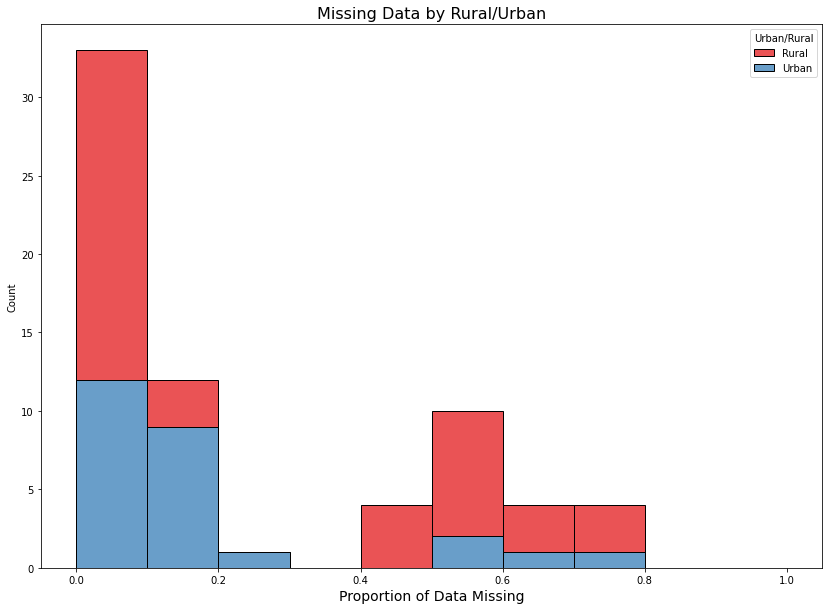

In [22]:
# Seaborn automatically chooses the hue feature as the legend title and doesn't allow it to be changed. 
# A hack to get around this is to change the name of the feature for the plot only.
fig, ax = plt.subplots(figsize=(14,10));
sns.histplot(data=meta_df.rename({'urban_rural': 'Urban/Rural'}, axis=1), ax=ax, stat="count", multiple="stack",
             x='missing_pct', kde=False,
             palette="Set1", hue="Urban/Rural", # hue_order=hue_order,
             element="bars", legend=True, bins=10, binrange=(0,1));
        
ax.set_title("Missing Data by Rural/Urban", fontsize=16);
ax.set_xlabel("Proportion of Data Missing", fontsize=14);

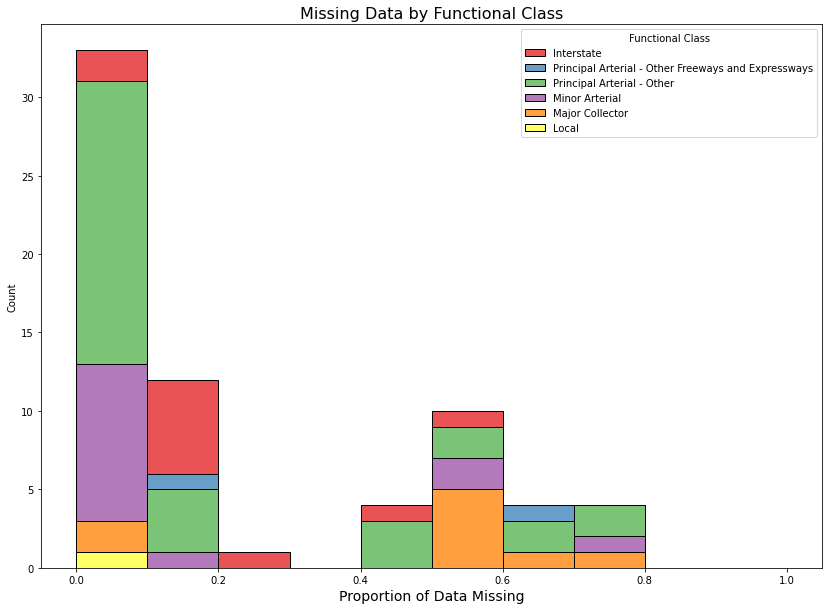

In [23]:
fig, ax = plt.subplots(figsize=(14,10));
hue_order = ['Interstate', 'Principal Arterial - Other Freeways and Expressways', 'Principal Arterial - Other', 
             'Minor Arterial', 'Major Collector', 'Local']
sns.histplot(data=meta_df.rename({'functional_class': 'Functional Class'}, axis=1), ax=ax, stat="count", multiple="stack",
             x='missing_pct', kde=False,
             palette="Set1", hue="Functional Class", hue_order=hue_order,
             element="bars", legend=True, bins=10, binrange=(0,1));
        
ax.set_title("Missing Data by Functional Class", fontsize=16);
ax.set_xlabel("Proportion of Data Missing", fontsize=14);

## Data Distribution

We begin by comparing the distributions for the MADT counts at individual stations. We group by functional class for comparison. Since the "Principal Arterial - Other" class is large, we split those stations into two plots for readability.

In [94]:
# The Principal Arterial - Other class is too large for the histograms to comfortably fit in a single plot.
# We'll divide it in 2.
label = 'Principal Arterial - Other'
pa_stations = list(meta_df[meta_df.functional_class == label].station_id)
s = int((len(pa_stations)+1)/2)
pa_stations_a = pa_stations[:s]
pa_stations_b = pa_stations[s:]
label_a = f'{label} (Stations {pa_stations_a[0]} - {pa_stations_a[-1]})'
label_b = f'{label} (Stations {pa_stations_b[0]} - {pa_stations_b[-1]})'
meta_df['functional_class_b'] = meta_df['functional_class']
meta_df.loc[meta_df.station_id.isin(pa_stations_a),'functional_class_b'] = label_a
meta_df.loc[meta_df.station_id.isin(pa_stations_b),'functional_class_b'] = label_b

In [95]:
functional_classes = ['Interstate', 'Principal Arterial - Other Freeways and Expressways', label_a, label_b, 
             'Minor Arterial', 'Major Collector', 'Local']
stations = []
for functional_class in functional_classes:
    station_list = list(meta_df[meta_df.functional_class_b == functional_class].station_id)
    stations.append(station_list)

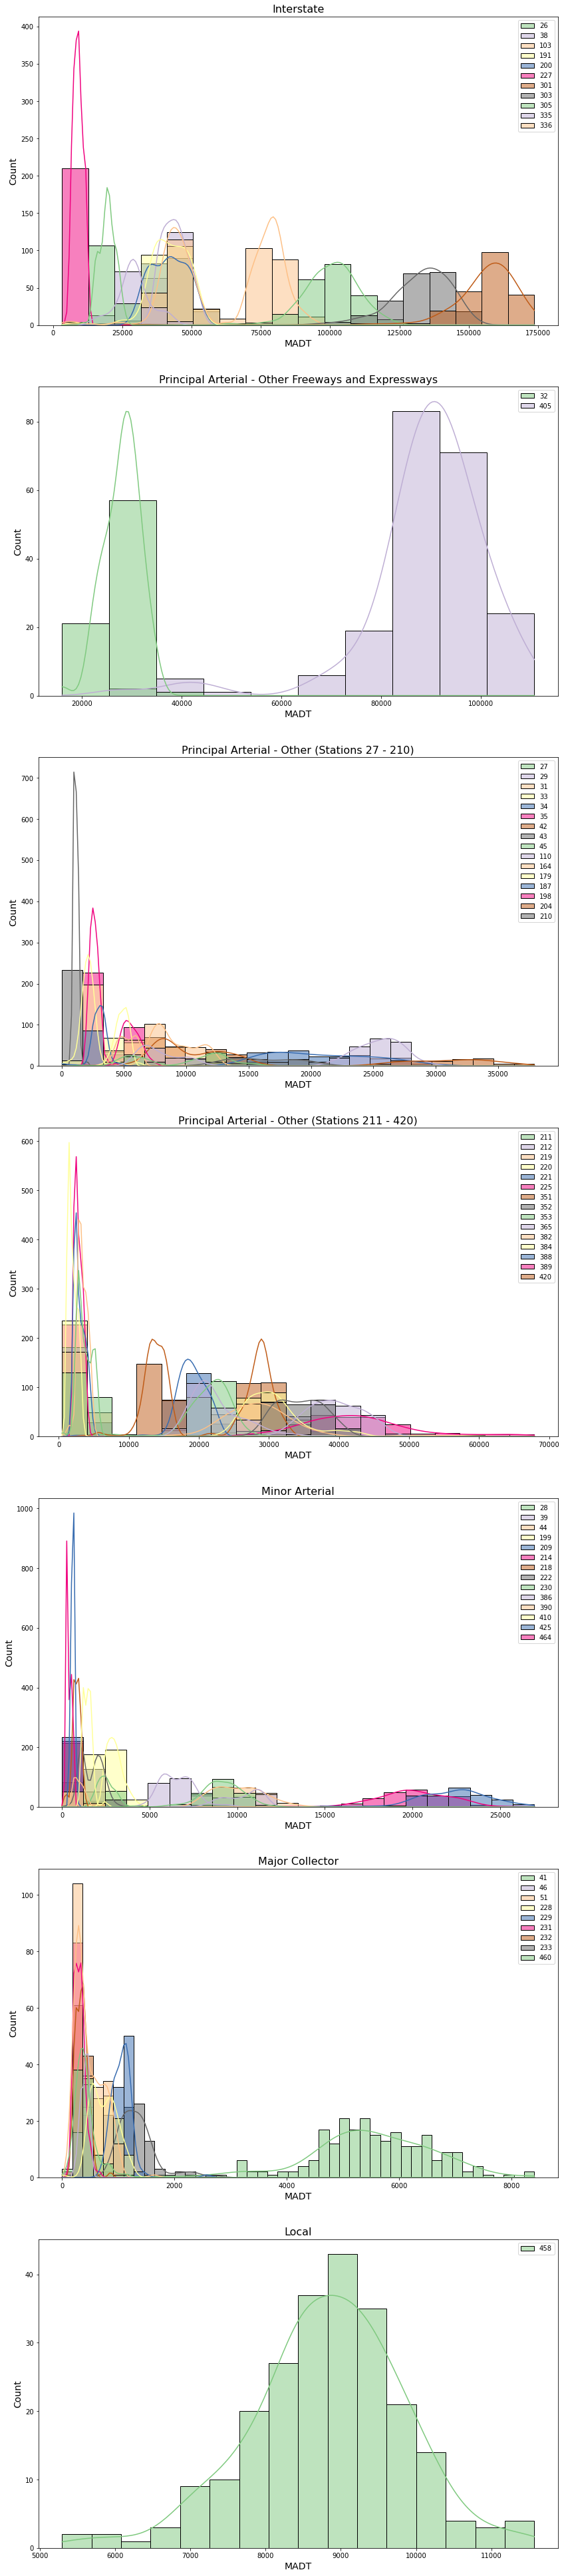

In [96]:
classes = len(functional_classes)
fig, ax = plt.subplots(classes, 1, figsize=(14,10 * classes));
extents = []

for i in range(classes):
    sns.histplot(data=df.loc[:,stations[i]], ax=ax[i], stat="count", multiple="layer", kde=True,
                 palette="Accent", element="bars", legend=True, alpha=0.5);
    ax[i].set_xlabel("MADT", fontsize=14);
    ax[i].set_ylabel('Count', fontsize=14)
    extent = ax[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extents.append(extent)
    ax[i].set_title(f'{functional_classes[i]}',fontsize=16)

for i in range(classes):
    # Get class name appropriate for using in filename
    class_name = functional_classes[i]
    is_changed = True
    while is_changed:
        old_class_name = class_name
        for s in [' ', '-', '(', ')', '__']:
            class_name = class_name.replace(s, '_')
        is_changed = (class_name != old_class_name)
    class_name = class_name.lower()
    
    
    filename = f'../LaTeX/figures/hist_{class_name}.png'
    fig.savefig(filename, bbox_inches=extents[i].expanded(1.2, 1.2));

In [97]:
meta_df = meta_df.drop('functional_class_b', axis=1)

The histograms in the preceding section indicate that the functional class seems to matter for the volume. That definitely makes sense, as freeways should have a larger volume than local roads.

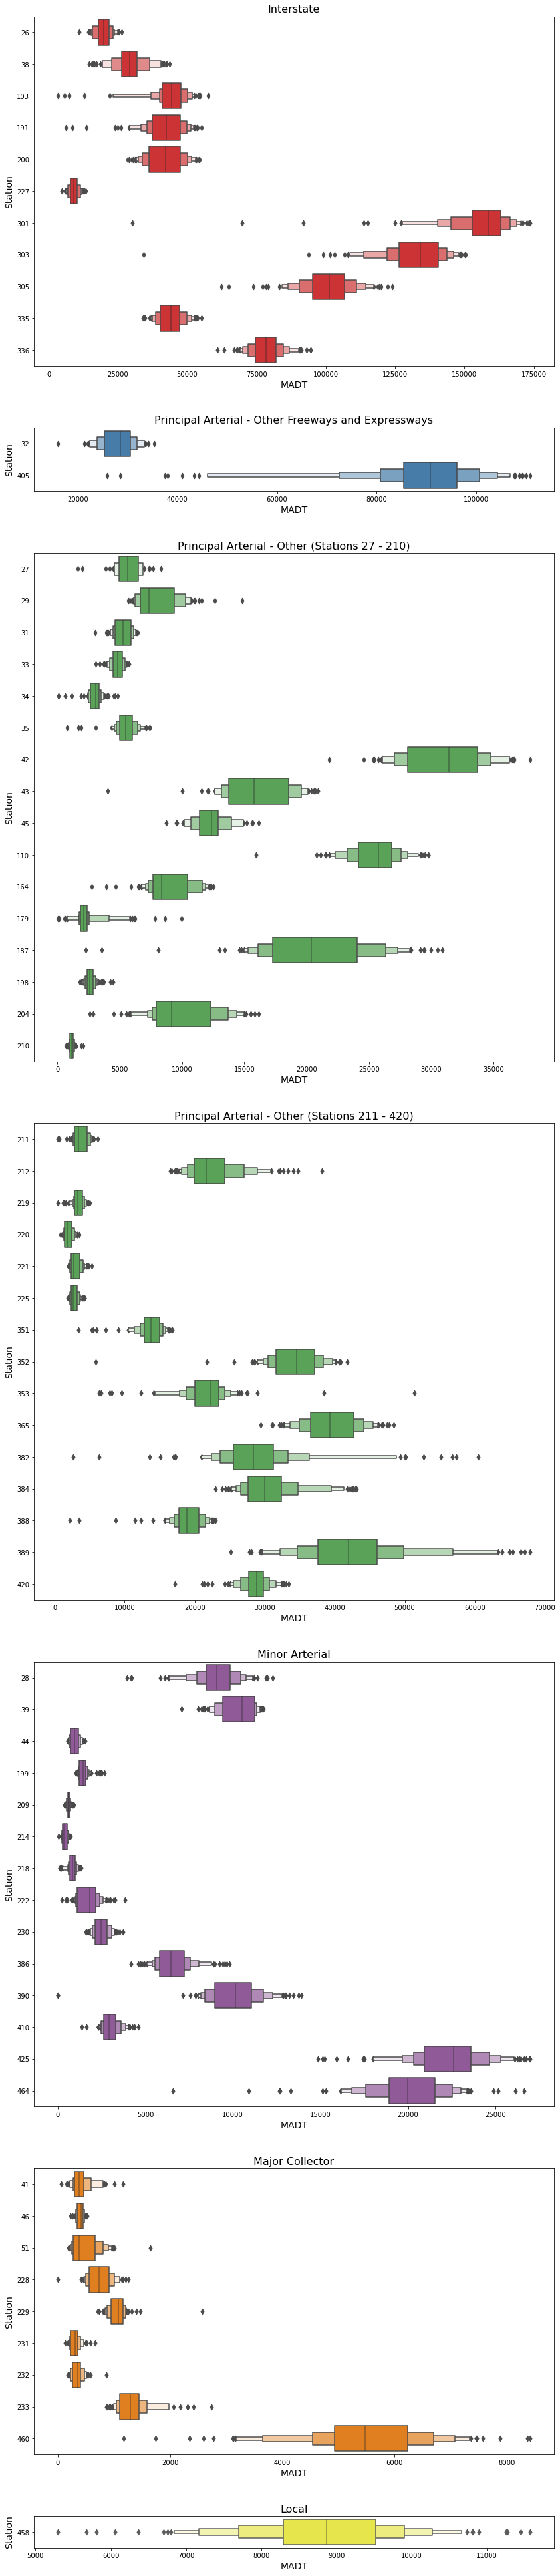

In [118]:
palette_colors = sns.color_palette('Set1')
indexes = [0, 1, 2, 2, 3, 4, 5]
classes = len(functional_classes)
station_lens = [len(s) for s in stations]
fig, axs = plt.subplots(nrows=classes, ncols=1, figsize=(14,10 * classes), 
                        gridspec_kw={'height_ratios':station_lens})
extents = []

for i in range(classes):
    sns.boxenplot(data=df.loc[:,stations[i]], ax=axs[i], orient='h', color=palette_colors[indexes[i]]);
    axs[i].set_xlabel("MADT", fontsize=14);
    axs[i].set_ylabel('Station', fontsize=14)
    extent = axs[i].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    extents.append(extent)
    axs[i].set_title(f'{functional_classes[i]}',fontsize=16)

for i in range(classes):
    # Get class name appropriate for using in filename
    class_name = functional_classes[i]
    is_changed = True
    while is_changed:
        old_class_name = class_name
        for s in [' ', '-', '(', ')', '__']:
            class_name = class_name.replace(s, '_')
        is_changed = (class_name != old_class_name)
    class_name = class_name.lower()
    
    
    filename = f'../LaTeX/figures/box_{class_name}.png'
    fig.savefig(filename, bbox_inches=extents[i].expanded(1.2, 1.2));

Two columns have zero entries. In both cases the zero entries are obvious outliers. We will view these as missing and impute along with other missing values.

In [446]:
df.min().sort_values()

228        0.000000
390        0.000000
179       27.870968
214       47.200000
41        58.451613
           ...     
301    30169.741935
335    33933.612903
303    34252.400000
336    60930.451613
305    62448.158602
Length: 68, dtype: float64

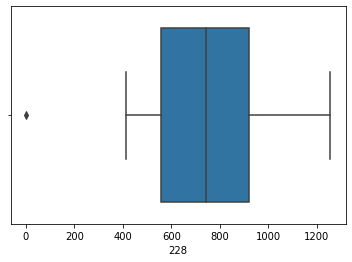

In [441]:
sns.boxplot(x=228, data=df);

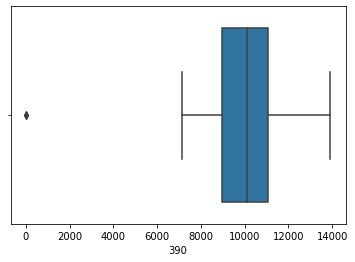

In [442]:
sns.boxplot(x=390, data=df);

In [462]:
df[df == 0].count().sum()

3

In [463]:
df[df == 0] = None

In [464]:
df[df == 0].count().sum()

0

The zero values have been successfully removed.

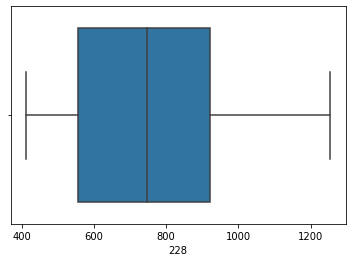

In [465]:
sns.boxplot(x=228, data=df);

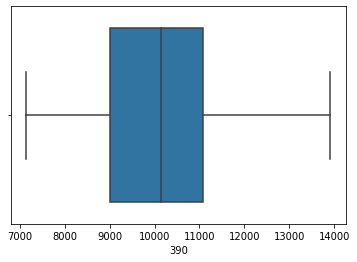

In [466]:
sns.boxplot(x=390, data=df);

There are some other small nonzero values. We look at those stations, but none seems obviously incorrect so all such values will be kept.

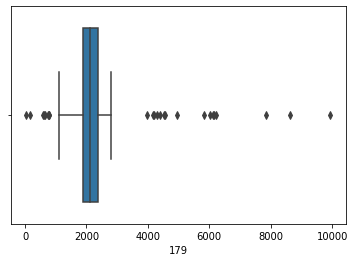

In [447]:
sns.boxplot(x=179, data=df);

In [451]:
df.loc[:,179].sort_values()

2012-08-31     27.870968
2012-09-30    163.933333
2019-05-31    579.741935
2019-12-31    616.129032
2019-11-30    643.250000
                 ...    
2019-07-31           NaN
2019-08-31           NaN
2019-09-30           NaN
2019-10-31           NaN
2020-08-31           NaN
Name: 179, Length: 235, dtype: float64

In [453]:
df.loc[:,179].first_valid_index()

Timestamp('2002-01-31 00:00:00', freq='M')

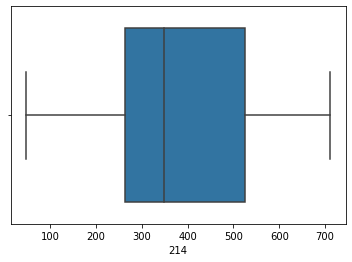

In [448]:
sns.boxplot(x=214, data=df);

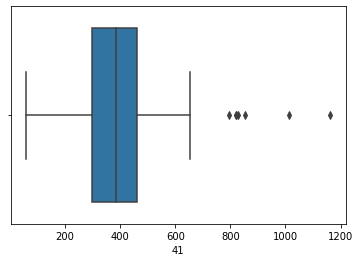

In [449]:
sns.boxplot(x=41, data=df);

# Autocorrelation

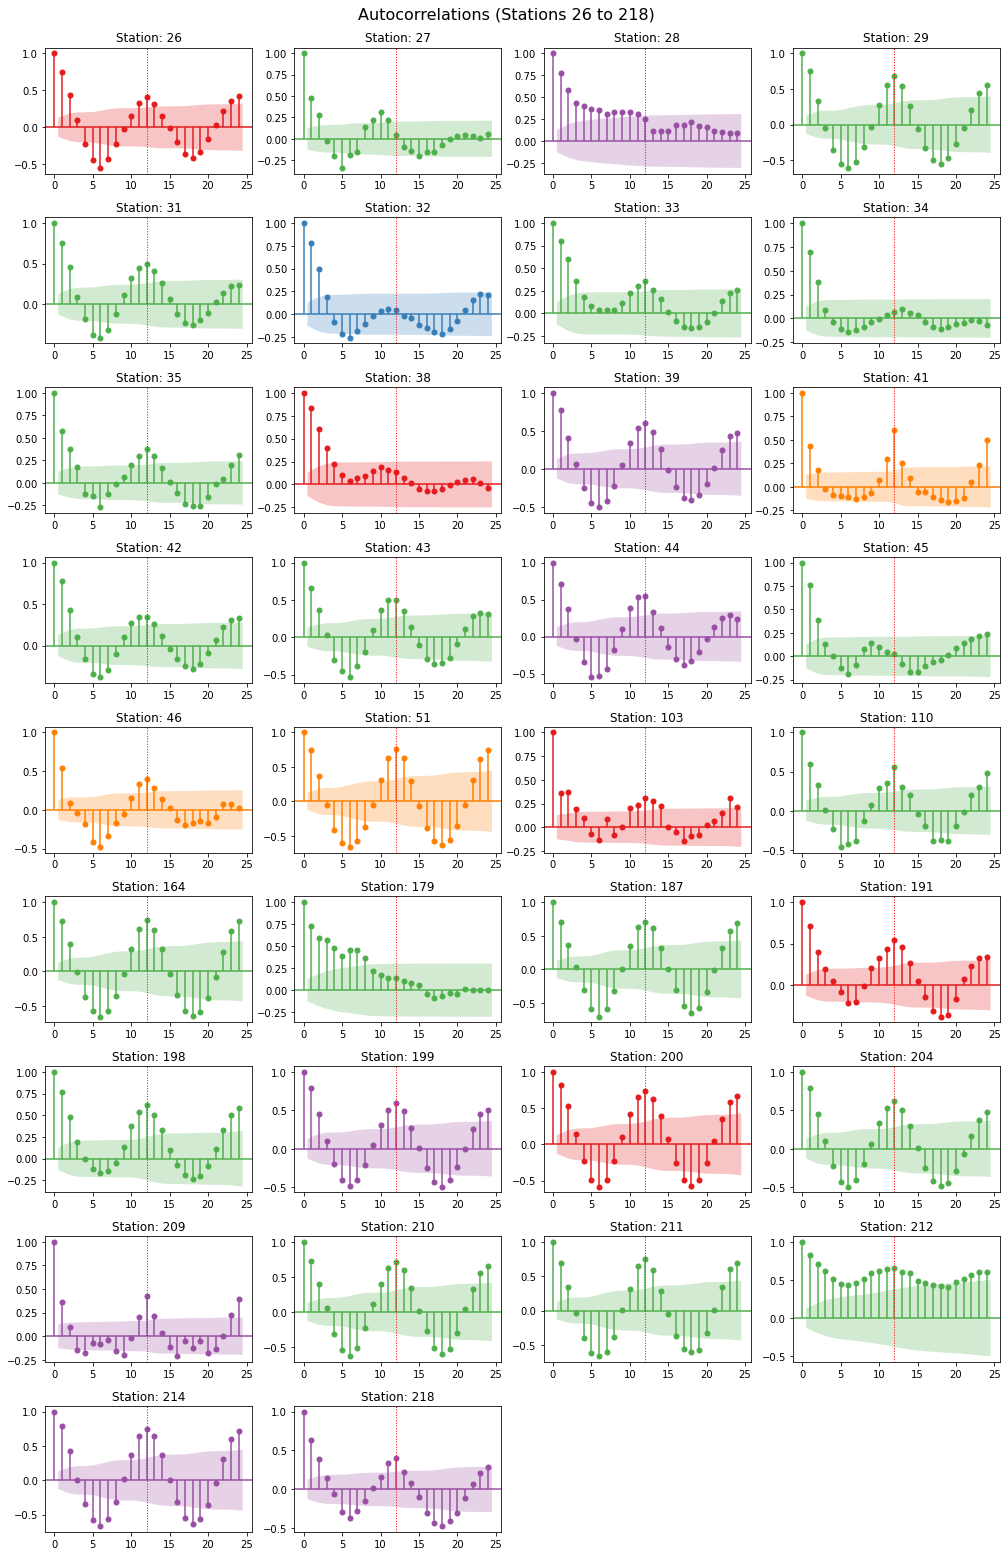

In [162]:
# Color change uses https://stackoverflow.com/questions/65870368/how-to-change-color-in-statsmodels-plot-acf-function
functional_classes = ['Interstate', 'Principal Arterial - Other Freeways and Expressways', 'Principal Arterial - Other', 
             'Minor Arterial', 'Major Collector', 'Local']
class_indices = { station_number: functional_classes.index(functional_class) 
                 for station_number, functional_class in zip(meta_df.station_id, meta_df.functional_class)}
    
palette_colors = sns.color_palette('Set1')

station_ids_a = df.columns[:34]
station_ids_b = df.columns[34:]
figsize=(14,40)

fig = plt.figure(figsize=figsize)
for idx, station_id in enumerate(station_ids_a):
    class_index = class_indices[station_id]
    color = palette_colors[class_index]
    c = idx % 4
    r = idx // 4
    ax = fig.add_subplot(17, 4, idx+1)
    plot_acf(df.loc[:,station_id], ax=ax, alpha=0.05, fft=True, missing='conservative',
            title='Station: ' + str(station_id), color=color, vlines_kwargs={"colors": color});
    #get polygon patch collections and change their color
    for item in ax.collections:
        if type(item)==PolyCollection:
            item.set_facecolor(color)
    ax.axvline(x=12, linewidth=1, linestyle=':', color='r');
plt.tight_layout();
fig.savefig('../LaTeX/figures/autocorrelations_a.png', bbox_inches='tight');
plt.suptitle(f'Autocorrelations (Stations {station_ids_a[0]} to {station_ids_a[-1]})', y=1.005, fontsize=16);
plt.show()


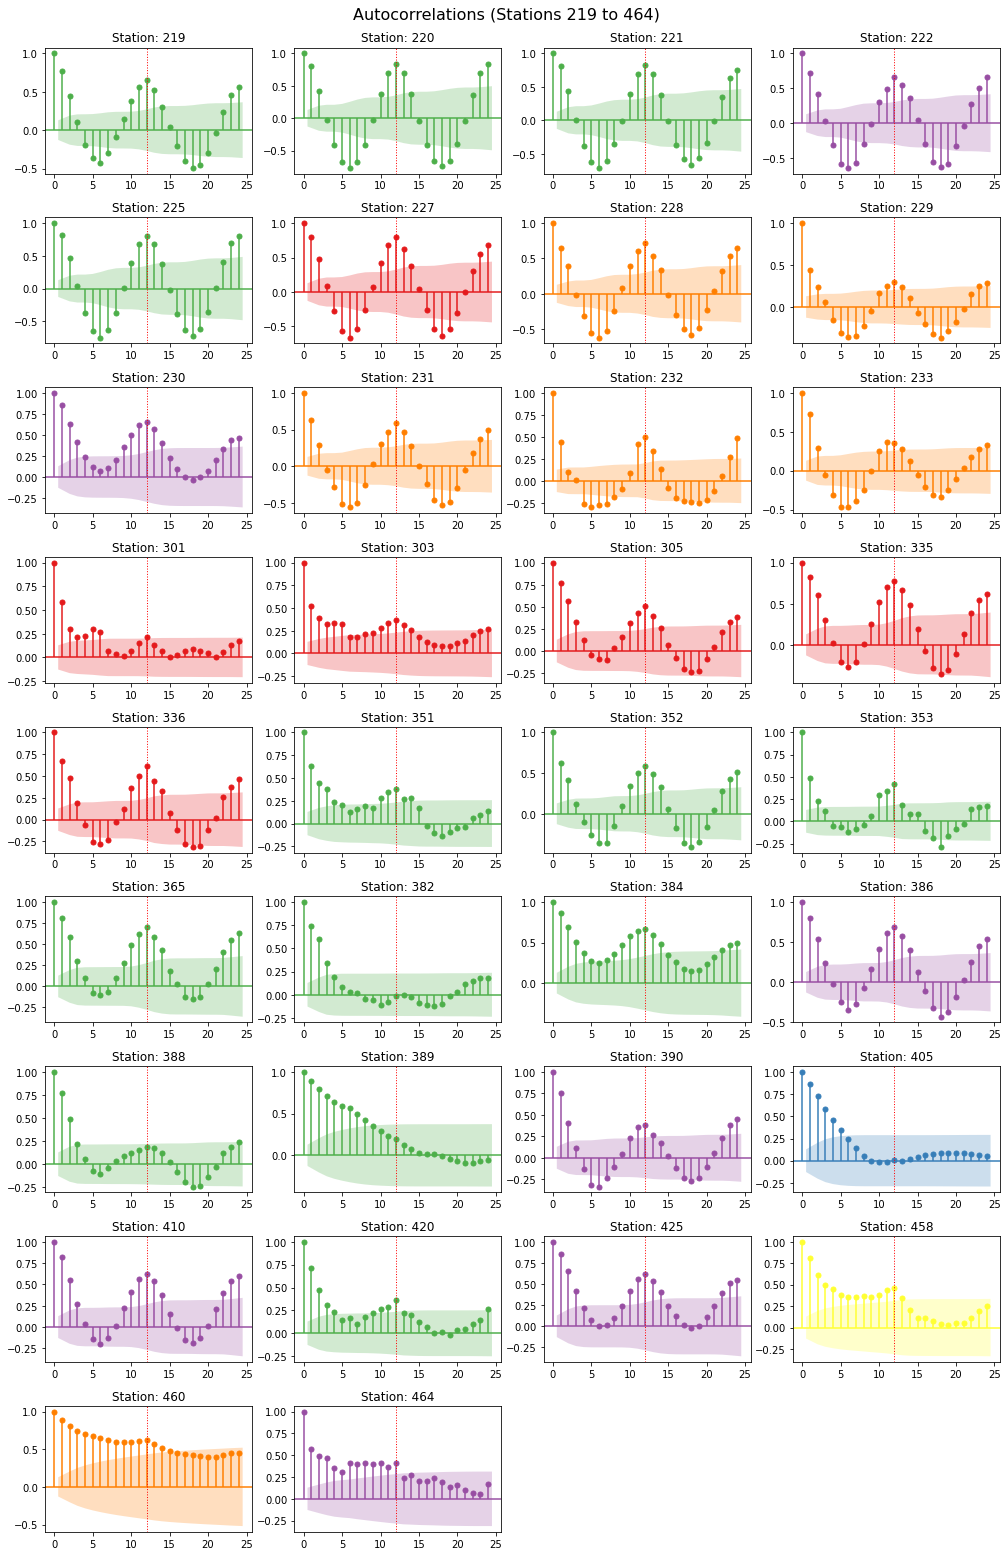

In [161]:
fig = plt.figure(figsize=figsize)
for idx, station_id in enumerate(station_ids_b):
    class_index = class_indices[station_id]
    color = palette_colors[class_index]
    c = idx % 4
    r = idx // 4
    ax = fig.add_subplot(17, 4, idx+1)
    plot_acf(df.loc[:,station_id], ax=ax, alpha=0.05, fft=True, missing='conservative',
            title='Station: ' + str(station_id), color=color, vlines_kwargs={"colors": color});
    #get polygon patch collections and change their color
    for item in ax.collections:
        if type(item)==PolyCollection:
            item.set_facecolor(color)
    ax.axvline(x=12, linewidth=1, linestyle=':', color='r');
plt.tight_layout();
fig.savefig('../LaTeX/figures/autocorrelations_b.png', bbox_inches='tight');
plt.suptitle(f'Autocorrelations (Stations {station_ids_b[0]} to {station_ids_b[-1]})', y=1.005, fontsize=16);
plt.show()

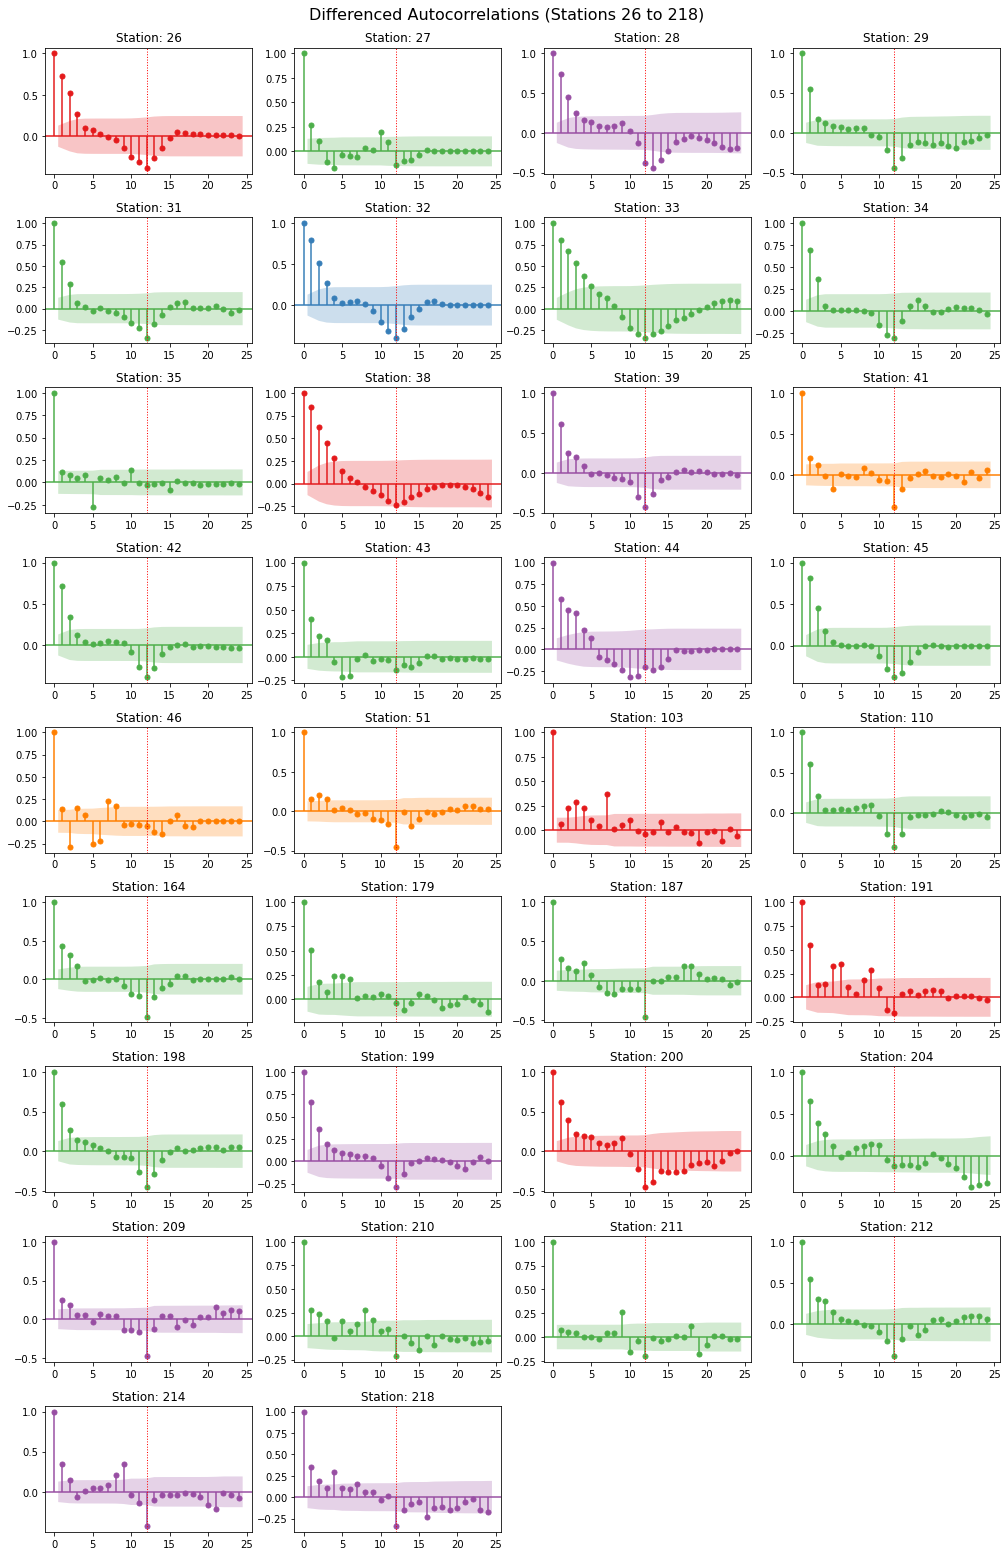

In [163]:
figsize=(14,40)

fig = plt.figure(figsize=figsize)
for idx, station_id in enumerate(station_ids_a):
    class_index = class_indices[station_id]
    color = palette_colors[class_index]
    c = idx % 4
    r = idx // 4
    ax = fig.add_subplot(17, 4, idx+1)
    plot_acf(df.diff(12).loc[:,station_id], ax=ax, alpha=0.05, fft=True, missing='conservative',
            title='Station: ' + str(station_id), color=color, vlines_kwargs={"colors": color});
    #get polygon patch collections and change their color
    for item in ax.collections:
        if type(item)==PolyCollection:
            item.set_facecolor(color)
    ax.axvline(x=12, linewidth=1, linestyle=':', color='r');
plt.tight_layout();
fig.savefig('../LaTeX/figures/autocorrelations_diff_a.png', bbox_inches='tight');
plt.suptitle(f'Differenced Autocorrelations (Stations {station_ids_a[0]} to {station_ids_a[-1]})', y=1.005, fontsize=16);
plt.show()


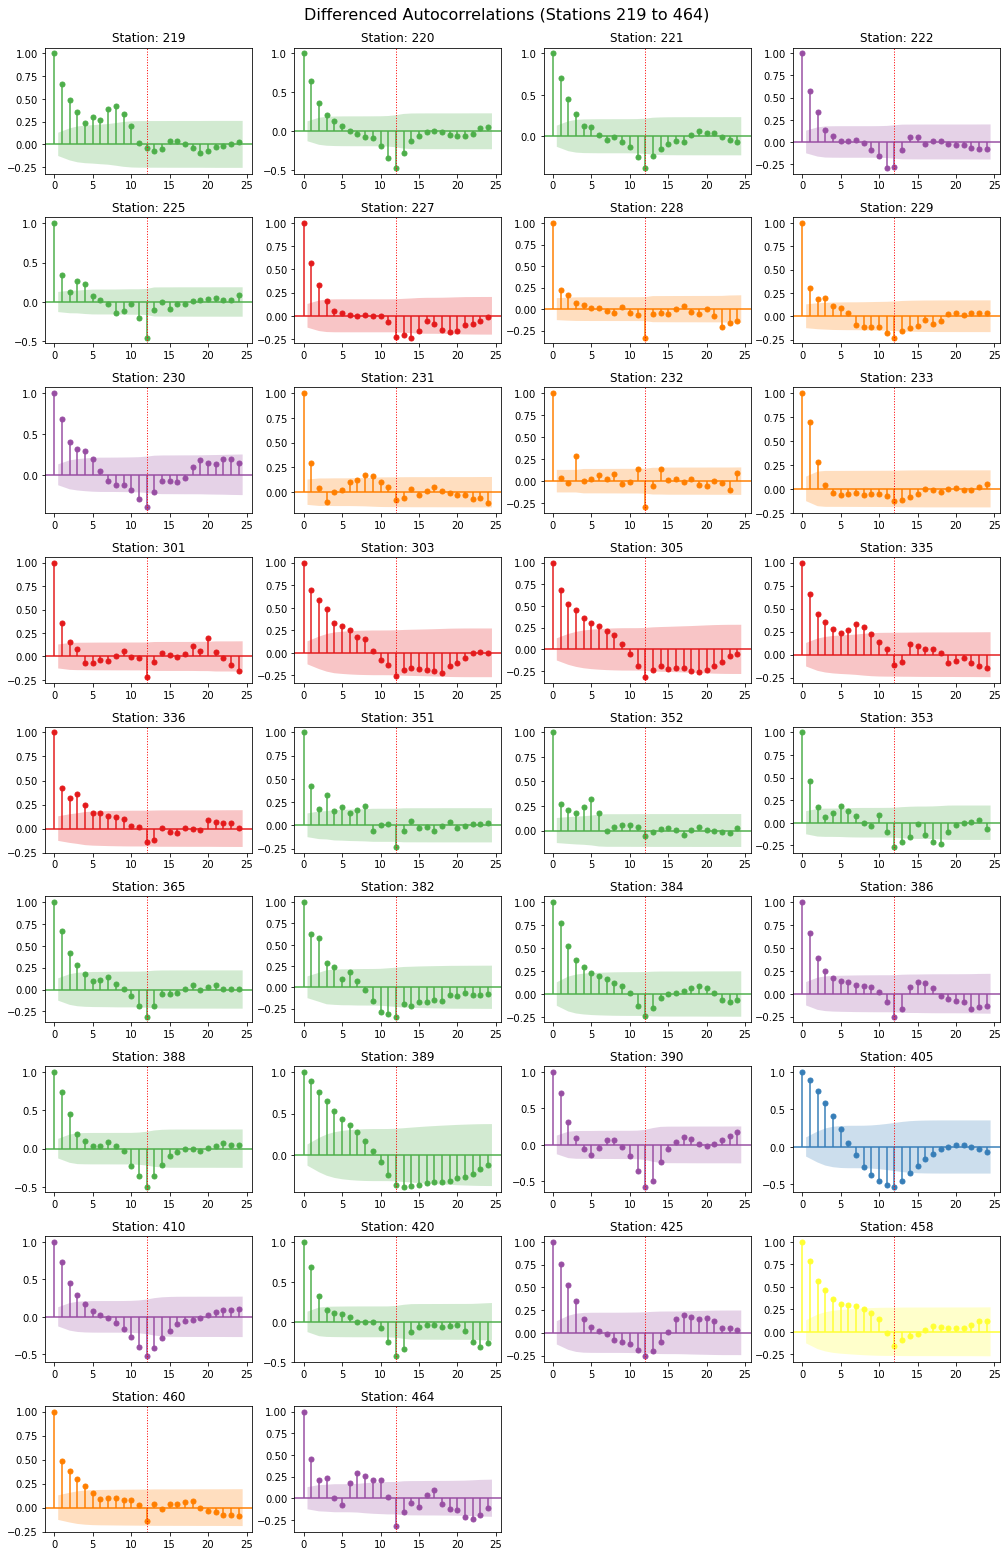

In [164]:
fig = plt.figure(figsize=figsize)
for idx, station_id in enumerate(station_ids_b):
    class_index = class_indices[station_id]
    color = palette_colors[class_index]
    c = idx % 4
    r = idx // 4
    ax = fig.add_subplot(17, 4, idx+1)
    plot_acf(df.diff(12).loc[:,station_id], ax=ax, alpha=0.05, fft=True, missing='conservative',
            title='Station: ' + str(station_id), color=color, vlines_kwargs={"colors": color});
    #get polygon patch collections and change their color
    for item in ax.collections:
        if type(item)==PolyCollection:
            item.set_facecolor(color)
    ax.axvline(x=12, linewidth=1, linestyle=':', color='r');
plt.tight_layout();
fig.savefig('../LaTeX/figures/autocorrelations_diff_b.png', bbox_inches='tight');
plt.suptitle(f'Differenced Autocorrelations (Stations {station_ids_b[0]} to {station_ids_b[-1]})', y=1.005, fontsize=16);
plt.show()

In [467]:
filename = 'data/updated_counts.pkl'
df.to_pickle(filename)

In [165]:
filename = 'data/station_metadata.pkl'
meta_df.to_pickle(filename)